## Setting up the model

#### Import the required libraries

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
from PIL import Image        # for classifying your images   

plt.style.use('seaborn-dark')

#### Loading and preprocessing the data

In [2]:
train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))


num_px = train_set_x_orig.shape[1]

# flattening a multi-dimensional array to a two-dimensional array
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# normalization
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

#### Next, we will define some helper functions

In [3]:
# define the sigmoid function to get activations
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
# initialize the parameters w (weights), b (bias) to zero.
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [5]:
# perform one iteration of forward and backward propogation
def propagate(w, b, X, Y):
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X)+b)
    cost = -(np.dot(Y, np.log(A).T) + np.dot(1-Y, np.log(1-A).T))/m
    
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m
    
    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [6]:
# perform gradient descent over certain number of iterations
def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [7]:
# make a prediction on a given image
def predict(w, b, X):
    A = sigmoid(np.dot(w.T, X)+b)
    
    Y_prediction = np.where(A>0.5, 1, 0)
    
    return Y_prediction

In [8]:
# bring together all the helper functions into the logistic regression model
def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    
    parameters, _, costs = optimize(w, b, X_train, Y_train, num_iterations=num_iterations, learning_rate=learning_rate, print_cost=print_cost)
    
    w, b = parameters['w'], parameters['b']
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    if print_cost:
        print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
        print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Train and test the model

In [9]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


## Test with your own image ##

You can use your own image and see the output of the model. To do that:
1. Add your image to this Jupyter Notebook's directory, in the "images" folder
2. Change your image's name in the following code
3. Run the code and check if the algorithm is right (1 = cat, 0 = non-cat)!

y = 0, the algorithm predicts a non-cat picture.


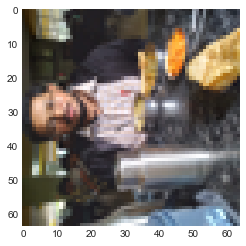

In [15]:
# change this to the name of your image file
my_image = "pklunch.jpg"   

# We preprocess the image to fit your algorithm
fpath = "images/" + my_image
image = np.array(Image.open(fpath).resize((num_px, num_px)))
plt.imshow(image)

image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print(f'y = {np.squeeze(my_predicted_image)}, the algorithm predicts a {classes[int(np.squeeze(my_predicted_image)),].decode("utf-8")} picture.')